## Stayzee rental price prediction hackathon. 

Two datasets covering various features have been given. 

Train.csv and Test.cvs both together have around 49,000 rows and 16 columns. However, not all columns are used for predicting the room prices. 

#### Selected columns for data cleaning and analysis:
    id : is for indexing purposes only
    neighbourhood_group
    neighbourhood
    room_type
    price
    minimum_nights
    number_of_reviews
    calculated_host_listings_count
    availability_365
    

#### Removed columns (does not have a direct influence in price variation):
    name
    host_id
    host_name
    last_review
    reviews_per_month
    latitude - corresponding neighbourhood name is given
    longitude - corresponding neighbourhood name is given

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline
import scipy.stats   
import scipy.special  
#import subprocess
import sklearn.linear_model
import sklearn.model_selection
import sklearn.pipeline  
import sklearn.preprocessing  
import sklearn.ensemble  
import sklearn.kernel_ridge 
color = sns.color_palette()
sns.set_style('darkgrid')

In [ ]:
rawData = pd.read_csv('../data/Train.csv')

### General Information

In [ ]:
rawData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,2019-07-05,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,NaN,4,82
4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,2019-05-26,0.27,1,365


In [ ]:
rawData.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27244.000000,34226.000000,34226.000000
mean,1.898209e+07,6.733847e+07,40.729059,-73.952070,153.480979,6.953690,23.390931,1.377074,7.093905,113.301730
std,1.097597e+07,7.833091e+07,0.054604,0.046161,243.312608,20.255833,44.476822,1.688953,32.828412,131.892814
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.460366e+06,7.824440e+06,40.690040,-73.983150,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.965371e+07,3.065628e+07,40.722995,-73.955700,107.000000,2.000000,5.000000,0.730000,1.000000,45.000000
75%,2.908201e+07,1.074344e+08,40.763200,-73.935982,175.000000,5.000000,24.000000,2.020000,2.000000,229.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
id                                34226 non-null int64
name                              34214 non-null object
host_id                           34226 non-null int64
host_name                         34213 non-null object
neighbourhood_group               34226 non-null object
neighbourhood                     34226 non-null object
latitude                          34226 non-null float64
longitude                         34226 non-null float64
room_type                         34226 non-null object
price                             34226 non-null int64
minimum_nights                    34226 non-null int64
number_of_reviews                 34226 non-null int64
last_review                       27244 non-null object
reviews_per_month                 27244 non-null float64
calculated_host_listings_count    34226 non-null int64
availability_365                  34226 non-null int64

In [ ]:
rawData.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

### EDA - missing numbers

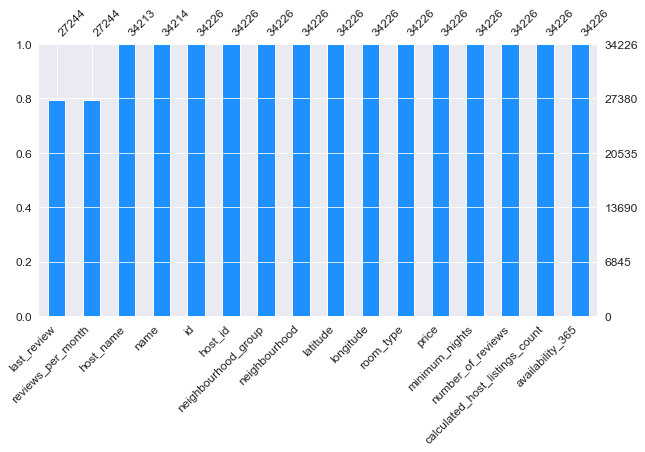

In [ ]:
import missingno as mn
mn.bar(rawData, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

### EDA - Single Variate Analysis

In [ ]:
### numerical columns for histogram plotting
cols = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25edab90>,
      dtype=object)

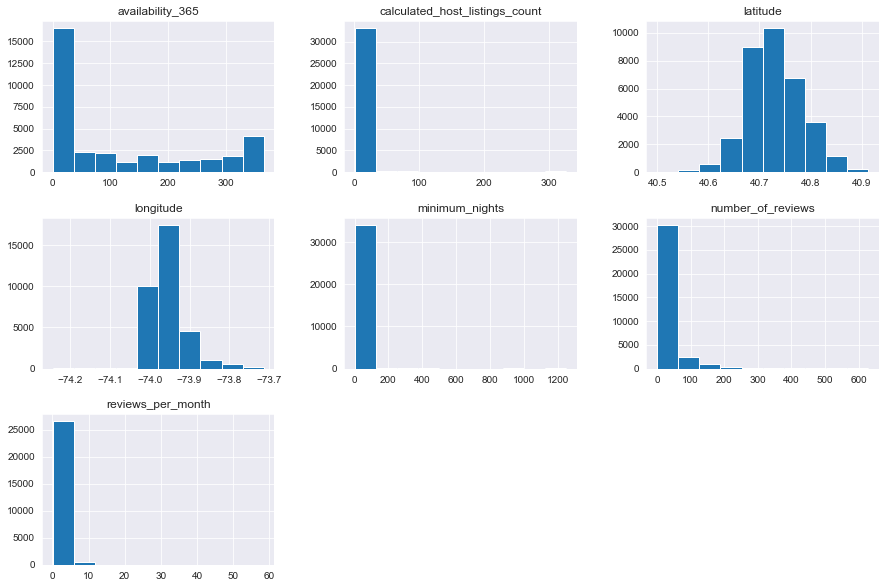

In [ ]:
rawData[cols].hist(figsize=(15,10))

### Observations
All columns are right skewed which means most of the values in each column are in lower range. 


In [ ]:
## Check the skewness of all independent numerical features

skewness_of_features = rawData[cols].apply(lambda x: scipy.stats.skew(x.dropna())).sort_values(ascending=False)
skewness_df = pd.DataFrame({'Skewness': skewness_of_features})
skewness_df

,Skewness
minimum_nights,23.998216
calculated_host_listings_count,7.969358
number_of_reviews,3.645205
reviews_per_month,3.481447
longitude,1.277207
availability_365,0.755958
latitude,0.239963


In [ ]:
## Compute the Box-Cox transformation of 1 + x for skewed features

skewness_df = skewness_df[abs(skewness_df) > 0.75]
print("skewness_df.shape = ", skewness_df.shape)
skewed_features = skewness_df.index
lamb = 0.15
for feature in skewed_features:
    rawData[feature] = scipy.special.boxcox1p(rawData[feature], lamb)

skewness_df.shape =  (7, 1)


In [ ]:
## Check skewness again
skewness_of_features = rawData[cols].apply(lambda x: scipy.stats.skew(x.dropna())).sort_values(ascending=False)
skewness_df = pd.DataFrame({'Skewness': skewness_of_features})
skewness_df.head(10)

,Skewness
calculated_host_listings_count,3.949995
minimum_nights,1.890737
reviews_per_month,0.858483
number_of_reviews,0.707668
latitude,0.236469
availability_365,-0.055154
longitude,NaN


In [ ]:
standardizedData = rawData[cols]

In [ ]:
# convert non-categorical variables to floats and standardize
 
def standardize_col(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

for col in cols:
    standardizedData[col] = rawData[col].astype(float)
    standardizedData[col] = standardize_col(rawData[col])

standardizedData.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-0.125627,NaN,0.565894,-0.463223,-1.056681,0.225762,-1.168085
1,1.302676,NaN,-0.845007,-1.145636,NaN,-0.409554,-1.168085
2,0.486205,NaN,-0.462243,-0.339504,1.640806,-0.409554,1.299153
3,-2.346259,NaN,-0.462243,-1.145636,NaN,0.444750,0.461100
4,1.485924,NaN,-0.845007,0.417804,-0.773692,-0.409554,1.299153


count    34226.000000
mean       153.480979
std        243.312608
min          0.000000
25%         69.000000
50%        107.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
mu = 153.48 and sigma = 243.31
Skewness: 18.815094
Kurtosis: 563.885281


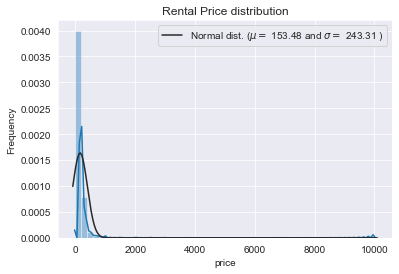

In [ ]:
### Let's look at the Dependent or Target Variable - Price

print(rawData['price'].describe())

sns.distplot(rawData['price'], fit=scipy.stats.norm);

# fit a gaussian function to Rental Price
(mu, sigma) = scipy.stats.norm.fit(rawData['price'])

# mean, std, skewness and kurtosis
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print("Skewness: %f" % rawData['price'].skew())
print("Kurtosis: %f" % rawData['price'].kurt())

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rental Price distribution')
plt.show()

In [ ]:
import math
from math import log

mu = 153.48 and sigma = 243.31
Skewness: 0.551689
Kurtosis: 1.834747


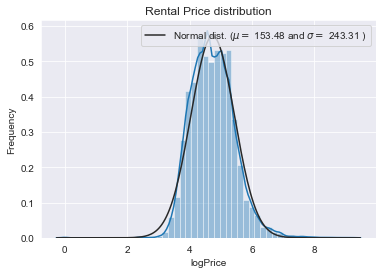

In [ ]:
## create feature Log1pPrice = log(1+Price)

#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
rawData["logPrice"] = np.log1p(rawData['price'])

#Check the new distribution 
sns.distplot(rawData['logPrice'] , fit=scipy.stats.norm);
(mu, sigma) = scipy.stats.norm.fit(rawData['price'])

# mean, std, skewness and kurtosis
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print("Skewness: %f" % rawData['logPrice'].skew())
print("Kurtosis: %f" % rawData['logPrice'].kurt())

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rental Price distribution')
plt.show()

### Observations

Price is now normally distributed and the skewness and Kurtosis have been adjusted to normal scale

### Multivariate Analysis

In [ ]:
rawData.groupby(['neighbourhood_group']).count()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,logPrice
neighbourhood_group,,,,,,,,,,,,,,,,
Bronx,767,766,767,766,767,767,0,767,767,767,767,619,619,767,767,767
Brooklyn,14033,14028,14033,14029,14033,14033,0,14033,14033,14033,14033,11516,11516,14033,14033,14033
Manhattan,15193,15187,15193,15187,15193,15193,0,15193,15193,15193,15193,11678,11678,15193,15193,15193
Queens,3985,3985,3985,3983,3985,3985,0,3985,3985,3985,3985,3215,3215,3985,3985,3985
Staten Island,248,248,248,248,248,248,0,248,248,248,248,216,216,248,248,248


<Figure size 432x288 with 0 Axes>

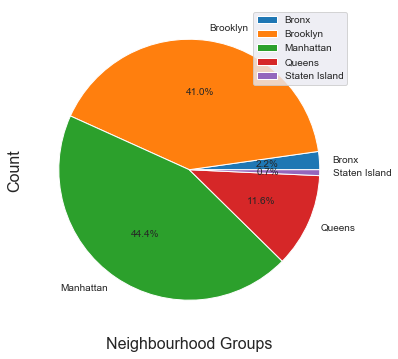

In [ ]:
fig=plt.figure()
rawData.groupby(['neighbourhood_group']).count().plot(kind='pie', y='price', figsize=(6,6), autopct='%1.1f%%')

fig.suptitle('Percentage of Listings in each Neighbourhood', fontsize=20)
plt.xlabel('Neighbourhood Groups', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.legend()
plt.show()

### Observations:
It has been observed that Manhattan has the highest number of rental listings followed by Brooklyn. Queens preceeds Brooklyn . Bronx takes the 4th position followed by Staten Island. 

In [ ]:
group = rawData.groupby(["neighbourhood_group"]).sum()
group.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,logPrice
neighbourhood_group,,,,,,,,,,,
Bronx,17344822039,79484902281,3839.411885,0.0,67608,1064.873916,2256.253128,611.467277,882.728499,4891.394875,3264.852644
Brooklyn,255305045591,789087332037,70149.447622,0.0,1766318,23676.919039,37582.744702,8253.453495,14646.648909,58337.727760,64278.383457
Manhattan,284829460965,1028272479440,75999.274970,0.0,2996561,29042.215399,36541.221298,8223.562135,22028.531724,66674.850767,76078.587188
Queens,86840177854,383651663262,19928.386931,0.0,393167,5913.641492,11327.220507,3093.821403,5032.753396,22173.709355,17491.707104
Staten Island,5361346208,24230077948,1238.940197,0.0,29386,351.448771,834.275100,214.586713,292.746369,1745.032278,1083.668996


### Observations
Rental listing price generated by each neighbourhood is as follows.. in the order of highest to lowest

    1) Manhattan @ $2996561
    2) Brooklyn @ $1766318
    3) Queens @ $393167
    4) Bronx @ $67608
    5) Staten Island @ 29386


In [ ]:
total_price = group["price"]
total_price.sum()

5253040

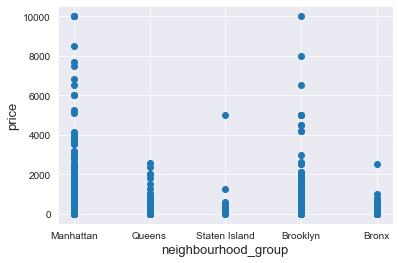

In [ ]:
fig, ax = plt.subplots()
ax.scatter(rawData['neighbourhood_group'], rawData['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('neighbourhood_group', fontsize=13)
plt.show()

In [ ]:
import matplotlib
from matplotlib import cm
log_prices = np.log(rawData['price'])
norm = matplotlib.colors.Normalize(vmin=min(log_prices), vmax=max(log_prices))
cmap = cm.hot

m = cm.ScalarMappable(norm=norm, cmap=cmap)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'house location and price, darker blue is more expensive')

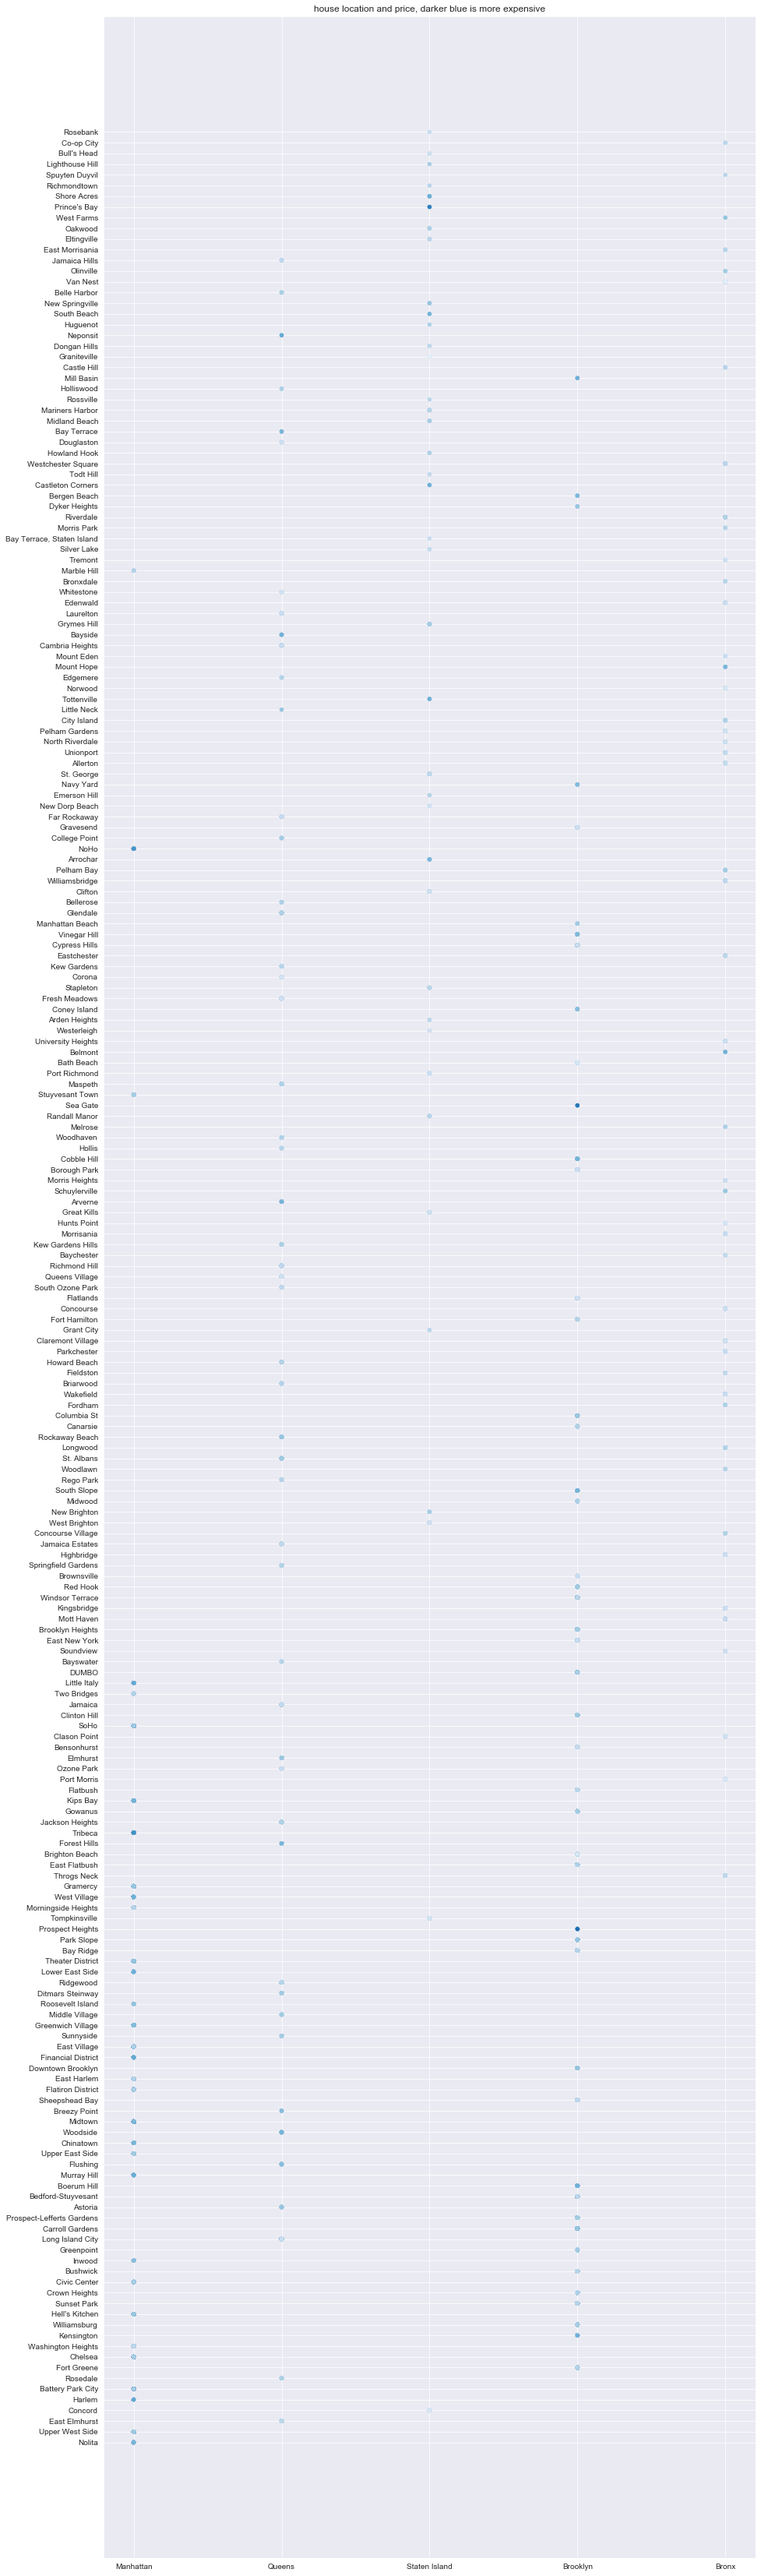

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,60))

ax.scatter(rawData['neighbourhood_group'],rawData['neighbourhood'], c=log_prices,s=30,linewidth=0,cmap="Blues")
ax.set_title('house location and price, darker blue is more expensive' )

In [ ]:
max_gp = rawData['neighbourhood_group'].value_counts()
max_gp

Manhattan        15193
Brooklyn         14033
Queens            3985
Bronx              767
Staten Island      248
Name: neighbourhood_group, dtype: int64

<Figure size 432x288 with 0 Axes>

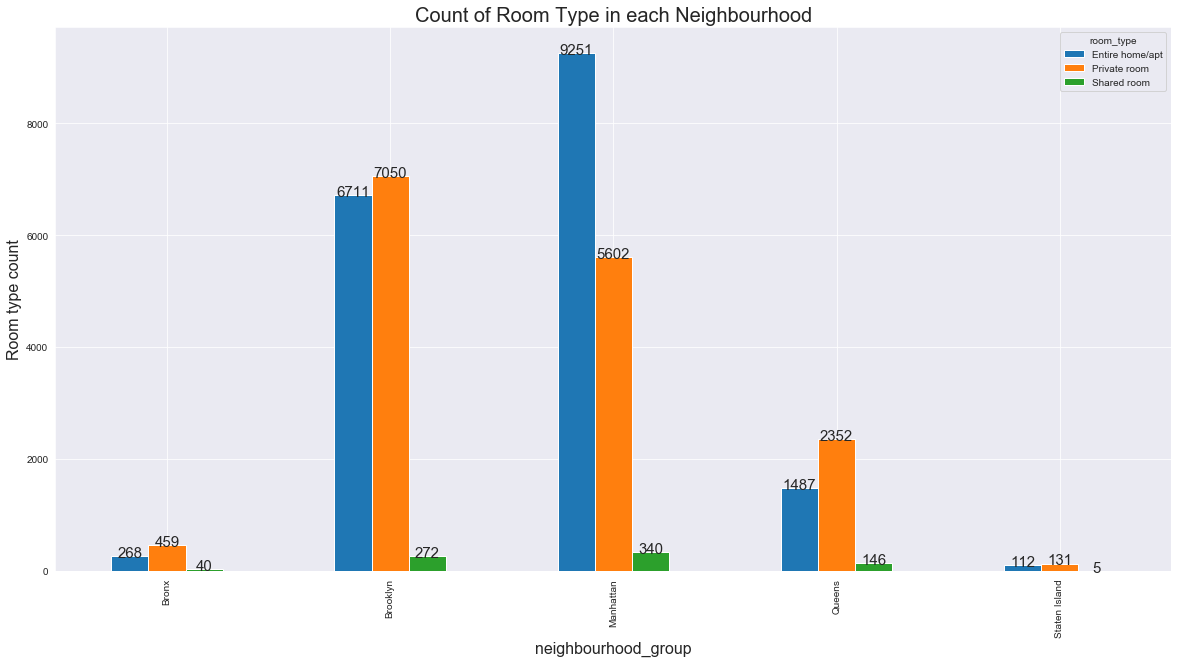

In [ ]:
fig = plt.figure()
ax=(rawData.loc[rawData['neighbourhood_group'].isin(max_gp.index),['neighbourhood_group','room_type']].groupby(['neighbourhood_group','room_type'])
 .neighbourhood_group.count()
 .unstack()
 .plot.bar(figsize=(20,10)))
ax.set_title('Count of Room Type in each Neighbourhood', fontsize=20)
ax.set_xlabel('neighbourhood_group', fontsize=16)
ax.set_ylabel('Room type count', fontsize=16)

for p in ax.patches:
    ax.annotate(format(round(p.get_height()), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 3), 
                   textcoords = 'offset points')

### Observations:
    1) it's been observed so far that there are about 20% missing values in 'last_review' and 'reviews_per_month' columns
    2) the price is between 0 and 10000 per night. it is assumed that the 0 values or the nominal rates refer to the loyal 
    customer or first time visitor segment where the customers are offered free goodies. As this is a practical scenario, the 
    variance in price range will be considered as is
    3) host_id,host name will have no direct influence in price change. Can be removed from the training dataset
    4) latitude and longitude are numbers and cannot be directly interpreted by the business owners/users. This is translated to 'neighbourhood'
    where in a name is assigned to each lat/long location. 
    5) 'name' column has less 'non-null' info however the data in the column doesnot have uniform information about the rooms per property. More so, it has 
    non-english characters. This column doesnot add much value in our predictions
    

In [ ]:
cols_train = ['neighbourhood_group', 
        'neighbourhood',
        'room_type',
        'price',
        'minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']

trainData = pd.read_csv('../data/train.csv', usecols=cols_train)

### Based on the EDA so far the above columns have been shortlisted for model building and evaluation

In [ ]:
trainData.shape

(34226, 8)

In [ ]:
# determine the number of missing entries in each column
for col in trainData.columns:
    print(col + ', Number of Missing Values:', trainData[col].isnull().sum())

neighbourhood_group, Number of Missing Values: 0
neighbourhood, Number of Missing Values: 0
room_type, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
calculated_host_listings_count, Number of Missing Values: 0
availability_365, Number of Missing Values: 0


### no missing values have been identified in the selected columns

In [ ]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 8 columns):
neighbourhood_group               34226 non-null object
neighbourhood                     34226 non-null object
room_type                         34226 non-null object
price                             34226 non-null int64
minimum_nights                    34226 non-null int64
number_of_reviews                 34226 non-null int64
calculated_host_listings_count    34226 non-null int64
availability_365                  34226 non-null int64
dtypes: int64(5), object(3)
memory usage: 2.1+ MB


In [ ]:
trainData.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000
mean,153.480979,6.953690,23.390931,7.093905,113.301730
std,243.312608,20.255833,44.476822,32.828412,131.892814
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,107.000000,2.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
trainData.dtypes

neighbourhood_group               object
neighbourhood                     object
room_type                         object
price                              int64
minimum_nights                     int64
number_of_reviews                  int64
calculated_host_listings_count     int64
availability_365                   int64
dtype: object

### identify and split the categorial and numerical values for model building and evaluation

In [ ]:
categorical_cols = trainData.select_dtypes(include='object')
numerical_cols = trainData.select_dtypes(include='number')

In [ ]:
categorical_cols['neighbourhood'].nunique()

217

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
le = LabelEncoder()

le.fit(categorical_cols['neighbourhood'])
categorical_cols['neighbourhood']=le.transform(categorical_cols['neighbourhood'])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### applied label encoding on 'neighbourhood' data as the data in this specific column has 217 unique values. 

In [ ]:
categorical_features_one_hot = pd.get_dummies(categorical_cols[['neighbourhood_group','room_type']])
categorical_features_one_hot.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0
2,0,0,0,1,0,1,0,0
3,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,1


### applied one hot encoding on 'neighbourhood_group' and 'room_type'

In [ ]:
categorical_cols= pd.concat([categorical_cols,categorical_features_one_hot],1)
categorical_cols.drop(['neighbourhood_group','room_type'],1,inplace=True)

In [ ]:
categorical_cols.head()

,neighbourhood,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,143,0,0,1,0,0,0,1,0
1,200,0,0,1,0,0,1,0,0
2,59,0,0,0,1,0,1,0,0
3,46,0,0,0,0,1,0,0,1
4,93,0,0,1,0,0,0,0,1


In [ ]:
df = pd.concat([categorical_cols,numerical_cols],1)

In [ ]:
df.head()

,neighbourhood,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,143,0,0,1,0,0,0,1,0,120,7,3,3,0
1,200,0,0,1,0,0,1,0,0,1500,1,0,1,0
2,59,0,0,0,1,0,1,0,0,200,2,4,1,365
3,46,0,0,0,0,1,0,0,1,30,2,0,4,82
4,93,0,0,1,0,0,0,0,1,115,1,16,1,365


In [ ]:
# read to CSV

df.to_csv('../data/data_clean.csv', index=False)

In [ ]:
from pandas.plotting._misc import scatter_matrix

In [ ]:
df_clean = pd.read_csv('../data/data_clean.csv')

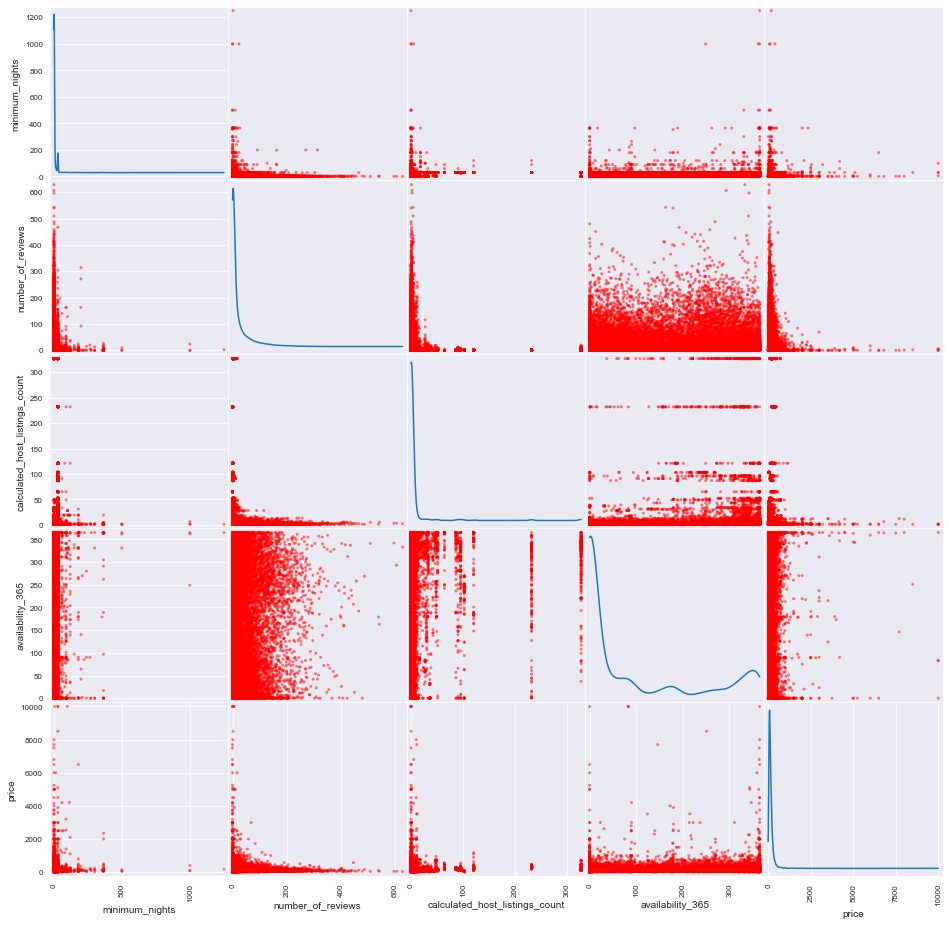

In [ ]:
# check for collinearity and visualize relationship between each predictor and price
matrix_cols = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'price']

axs = scatter_matrix(df[matrix_cols], figsize=(16, 16), c='red', diagonal='kde')

In [ ]:
X=df_clean.drop(['price'],1)
y=df_clean['price']

In [ ]:
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pylab

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

### train and test data has been split in 70:30 ratio 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

NameError: ignored

### linear regression vanilla model is considered for initial evaluation

In [ ]:
#y_pred = lr.predict(X_val)
y_pred = lr.predict(X_test)

print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

Test RMSE: 190.8801898885373


### other base regression models - 'lasso', 'kernel ridge', 'elastic net' are  evaluated as below -

In [ ]:
from sklearn.linear_model import ElasticNet,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [ ]:
#Validation function
n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=50).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### lasso

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0001, max_iter=100000, random_state=50))

In [ ]:
score = rmse_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 245.4261 (29.7401)



### kernel ridge

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [ ]:
score = rmse_cv(KRR)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KRR score: 244.7975 (29.9417)



In [ ]:
### elastic net

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0001, l1_ratio=.9, random_state=50))

In [ ]:
score = rmse_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504342295.10694575, tolerance: 132773.43169406243
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438824579.49632555, tolerance: 115270.29152032245
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525216362.2943516, tolerance: 132696.0012298706
  positive)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to incr

ElasticNet score: 245.4261 (29.7402)



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467815110.10481954, tolerance: 123538.73298238643
  positive)


### for better prediction, ensemble models - GradientBoostingRegressor, RandomForestRegressor, VotingRegressor are used
### RandomisedSearchCV and GridSearchCV are used for hyper parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor ,RandomForestRegressor

### gradient boost

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =50)

In [ ]:
score = rmse_cv(GBoost)
print("\nGradientBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


GradientBoost score: 240.9446 (29.9870)



### random forest regressor

In [ ]:
rf_model = RandomForestRegressor(random_state=50)
param_grid = dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(50,500,20),min_samples_leaf=range(25,75,10),max_leaf_nodes=range(8,32,2))
grid_rf = RandomizedSearchCV(rf_model,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=50)
grid_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=50),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_leaf_nodes': range(8, 32, 2),
                                        'min_samples_leaf': range(25, 75, 10),
                                        'min_samples_split': range(50, 500, 20),
                                        'n_estimators': range(10, 100, 10)},
                   random_state=50, scoring='neg_mean_squared_error')

In [ ]:

rf_pred = grid_rf.best_estimator_.predict(X_test)

print(grid_rf.best_params_)

print('Test RMSE:',np.sqrt(sklearn.metrics.mean_squared_error(y_test, rf_pred)))

{'n_estimators': 50, 'min_samples_split': 230, 'min_samples_leaf': 35, 'max_leaf_nodes': 28, 'max_depth': 16}
Test RMSE: 188.41188577849417


### voting regressor

In [ ]:
# Import libraries
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

# Various models
clf_1 = LinearRegression()
clf_2 = XGBRegressor(random_state=50)
clf_3 = RandomForestRegressor(random_state=50)

model_list = [('lr',clf_1),('DT',clf_2),('RF',clf_3)]

# Code starts here
# Initialize voting classifier
voting_clf_hard = VotingRegressor(estimators=model_list)
# Fit the model on training data
voting_clf_hard.fit(X_train,y_train)

# predict on test
y_pred_vot = voting_clf_hard.predict(X_test)
# accuracy
hard_voting_score = voting_clf_hard.score(X_test,y_test)

print(np.sqrt(mean_squared_error(y_test,y_pred_vot)))

202.87837558196435


### decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

dt_reg = DecisionTreeRegressor(random_state=50)
param_grid = dict(max_depth=range(5,20), min_samples_split=range(50,200,10), min_samples_leaf=range(25,100,10), max_leaf_nodes=range(8,32,2), min_impurity_decrease=(0.3,1.0,0.1))
grid_dt = RandomizedSearchCV(dt_reg, param_grid, scoring='neg_mean_squared_error', n_jobs=4, cv=5, random_state=50)
grid_dt.fit(X_train,y_train)

dt_pred1 = grid_dt.best_estimator_.predict(X_test)

print(grid_dt.best_params_)

print('Test RMSE:',np.sqrt(sklearn.metrics.mean_squared_error(y_test, dt_pred1)))

{'min_samples_split': 130, 'min_samples_leaf': 55, 'min_impurity_decrease': 1.0, 'max_leaf_nodes': 30, 'max_depth': 15}
Test RMSE: 191.0445528455975


### xg boost

In [ ]:
from xgboost import XGBRegressor 
grid_xgb = XGBRegressor(objective='reg:squarederror',n_jobs=-1,subsample = 0.7, scale_pos_weight= 5, reg_lambda= 4, n_estimators = 110, min_child_weight= 13, max_depth = 12, learning_rate= 0.1, colsample_bytree = 0.9, colsample_bynode= 0.9)
grid_xgb.fit(X_train,y_train)

xgb_pred1 = grid_xgb.predict(X_test)

print('Test RMSE:',np.sqrt(mean_squared_error(y_test, xgb_pred1)))


Test RMSE: 192.0283691165452


### Evaluation of Test Data

In [ ]:
cols = ['neighbourhood_group', 
        'neighbourhood',
        'room_type',
        'minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
data_t = pd.read_csv('../data/test.csv', usecols=cols)

In [ ]:
data_id = pd.read_csv('../data/test.csv')

In [ ]:
df_t = data_id['id']

In [ ]:
# determine the number of missing entries in each column
for col in data_t.columns:
    print(col + ', Number of Missing Values:', data_t[col].isnull().sum())

neighbourhood_group, Number of Missing Values: 0
neighbourhood, Number of Missing Values: 0
room_type, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
calculated_host_listings_count, Number of Missing Values: 0
availability_365, Number of Missing Values: 0


In [ ]:
data_t.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
data_t.shape

(14669, 7)

In [ ]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14669 entries, 0 to 14668
Data columns (total 7 columns):
neighbourhood_group               14669 non-null object
neighbourhood                     14669 non-null object
room_type                         14669 non-null object
minimum_nights                    14669 non-null int64
number_of_reviews                 14669 non-null int64
calculated_host_listings_count    14669 non-null int64
availability_365                  14669 non-null int64
dtypes: int64(4), object(3)
memory usage: 802.3+ KB


In [ ]:
cat_col_t = data_t.select_dtypes(include = 'object')
num_col_t = data_t.select_dtypes(include = 'number')

### neighbourhood is label encoded as the number of categorical values are too many

In [ ]:
le = LabelEncoder()

le.fit(cat_col_t['neighbourhood'])
cat_col_t['neighbourhood']=le.transform(cat_col_t['neighbourhood'])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### 'neighbourhood_group' and 'room_type' are onehotencoded

In [ ]:
categorical_features_one_hot_t = pd.get_dummies(cat_col_t[['neighbourhood_group','room_type']])
categorical_features_one_hot_t.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,1,0


In [ ]:
df_test = pd.concat([cat_col_t,categorical_features_one_hot_t, num_col_t],1)

In [ ]:
df_test.drop(['neighbourhood_group', 'room_type'],1, inplace=True)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14669 entries, 0 to 14668
Data columns (total 13 columns):
neighbourhood                        14669 non-null int64
neighbourhood_group_Bronx            14669 non-null uint8
neighbourhood_group_Brooklyn         14669 non-null uint8
neighbourhood_group_Manhattan        14669 non-null uint8
neighbourhood_group_Queens           14669 non-null uint8
neighbourhood_group_Staten Island    14669 non-null uint8
room_type_Entire home/apt            14669 non-null uint8
room_type_Private room               14669 non-null uint8
room_type_Shared room                14669 non-null uint8
minimum_nights                       14669 non-null int64
number_of_reviews                    14669 non-null int64
calculated_host_listings_count       14669 non-null int64
availability_365                     14669 non-null int64
dtypes: int64(5), uint8(8)
memory usage: 687.7 KB


### randomforest displayed a low 'rmse' score compared to other regression models. hence it is used for predicting the test dataset 'price'

In [ ]:
y_pred_test = grid_rf.best_estimator_.predict(df_test)

In [ ]:
y_pred_test

array([156.29940012, 187.65958651,  71.49105836, ..., 101.07300588,
       220.50578871, 154.82991391])

In [ ]:
submissions_f = pd.DataFrame(y_pred_test,index = df_t,columns = ['price'])

In [ ]:
submissions_f.head()

,price
id,
1525602,156.299400
30430185,187.659587
21354525,71.491058
35995074,98.455426
34392081,71.491058


In [ ]:
submissions_f.to_csv('../data/submission_f.csv')